# Example

In [1]:
# Hidden cell
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
print("xarray: %s, %s" % (xr.__version__, xr.__file__))

import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))

import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

/Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/distributed/utils.py:134: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 51] Network is unreachable
  % (host, default, e), RuntimeWarning)


xarray: 0.12.1, /Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/xarray/__init__.py
pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


## Create a model

Let's import the Profile Classification Model (PCM) constructor:

In [2]:
from pyxpcm.models import pcm

In [3]:
z = np.arange(0.,-1000,-10.)
pcm_features = {'temperature': z, 'salinity':z}

We can now instantiate a PCM, say with 8 classes:

In [4]:
m = pcm(K=8, features=pcm_features)
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing.data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition.pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing.data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition.pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>

## Load training data

In [5]:
import pyxpcm
ds = pyxpcm.tutorial.open_dataset('argo').load()
print(ds)

<xarray.Dataset>
Dimensions:    (DEPTH: 282, N_PROF: 7560)
Coordinates:
  * DEPTH      (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
Dimensions without coordinates: N_PROF
Data variables:
    LATITUDE   (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    LONGITUDE  (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    TIME       (N_PROF) datetime64[ns] dask.array<shape=(7560,), chunksize=(7560,)>
    DBINDEX    (N_PROF) float64 dask.array<shape=(7560,), chunksize=(7560,)>
    TEMP       (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PSAL       (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    SIG0       (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    BRV2       (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
Attributes:
    Sample test prepared by:  G. Maze
    Institution:              Ifremer/LOPS
    Data source D

## Fit the model on data

In [6]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}

In [7]:
features_zdim='DEPTH'

Now we're ready to fit the model on the this dataset:

In [8]:
m.fit(ds, features=features_in_ds, dim=features_zdim)
m 

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing.data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition.pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing.data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition.pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture.gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 38.822988

## Classify data

Now that the PCM is fitted, we can predict the classification results like:

In [20]:
m.predict(ds, features=features_in_ds, inplace=True)
ds

/Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/xarray.py:82: UserWarning: PCM_LABELS variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


<xarray.Dataset>
Dimensions:     (DEPTH: 282, N_PROF: 7560, pcm_class: 8, quantile: 3)
Coordinates:
  * pcm_class   (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF      (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH       (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
  * quantile    (quantile) float64 0.05 0.5 0.95
Data variables:
    LATITUDE    (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    LONGITUDE   (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    TIME        (N_PROF) datetime64[ns] dask.array<shape=(7560,), chunksize=(7560,)>
    DBINDEX     (N_PROF) float64 dask.array<shape=(7560,), chunksize=(7560,)>
    TEMP        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PSAL        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    SIG0        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    BRV2        (N_PROF, DE

Prediction labels are automatically added to the dataset as ``PCM_LABELS`` because the option ``inplace`` was set to ``True``. We didn't specify the ``dim`` option because our dataset is CF compliant.

pyXpcm use a GMM classifier by default, which is a fuzzy classifier. So we can also predict the probability of each classes for all profiles, the so-called *posteriors*:

In [10]:
m.predict_proba(ds, inplace=True)
ds

<xarray.Dataset>
Dimensions:     (DEPTH: 282, N_PROF: 7560, pcm_class: 8)
Coordinates:
  * N_PROF      (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH       (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
Dimensions without coordinates: pcm_class
Data variables:
    LATITUDE    (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    LONGITUDE   (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    TIME        (N_PROF) datetime64[ns] dask.array<shape=(7560,), chunksize=(7560,)>
    DBINDEX     (N_PROF) float64 dask.array<shape=(7560,), chunksize=(7560,)>
    TEMP        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PSAL        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    SIG0        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    BRV2        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    

In [11]:
print("Data variables BEFORE cleaning", ds.data_vars)

ds_after = ds.pyxpcm.clean() 

print("\nData variables AFTER cleaning", ds_after.data_vars)

Data variables BEFORE cleaning Data variables:
    LATITUDE    (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    LONGITUDE   (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    TIME        (N_PROF) datetime64[ns] dask.array<shape=(7560,), chunksize=(7560,)>
    DBINDEX     (N_PROF) float64 dask.array<shape=(7560,), chunksize=(7560,)>
    TEMP        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PSAL        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    SIG0        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    BRV2        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PCM_LABELS  (N_PROF) int64 4 4 4 4 4 4 4 4 4 4 4 4 ... 2 2 2 2 2 2 2 2 2 2 2
    PCM_POST    (pcm_class, N_PROF) float64 3.03e-35 1.053e-48 ... 7.695e-87

Data variables AFTER cleaning Data variables:
    LATITUDE   (N_PROF) float32 dask.array<shape=(7560,),

It is important to note that once the PCM is fitted, you can predict labels for any dataset, as long as it has the PCM features.

For instance, let's predict labels for a gridded dataset:

In [12]:
ds_gridded = pyxpcm.tutorial.open_dataset('isas_snapshot').load()
print(ds_gridded)

<xarray.Dataset>
Dimensions:      (depth: 152, latitude: 53, longitude: 61)
Coordinates:
  * latitude     (latitude) float32 30.023445 30.455408 ... 49.41288 49.737103
  * longitude    (longitude) float32 -70.0 -69.5 -69.0 ... -41.0 -40.5 -40.0
  * depth        (depth) float32 -1.0 -3.0 -5.0 ... -1960.0 -1980.0 -2000.0
Data variables:
    TEMP         (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    TEMP_ERR     (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    TEMP_PCTVAR  (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL         (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL_ERR     (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL_PCTVAR  (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61

In [13]:
m.predict(ds_gridded, features={'temperature':'TEMP','salinity':'PSAL'}, dim='depth', inplace=True)
ds_gridded

<xarray.Dataset>
Dimensions:      (depth: 152, latitude: 53, longitude: 61)
Coordinates:
  * latitude     (latitude) float64 30.02 30.46 30.89 ... 49.09 49.41 49.74
  * longitude    (longitude) float64 -70.0 -69.5 -69.0 ... -41.0 -40.5 -40.0
  * depth        (depth) float32 -1.0 -3.0 -5.0 ... -1960.0 -1980.0 -2000.0
Data variables:
    TEMP         (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    TEMP_ERR     (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    TEMP_PCTVAR  (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL         (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL_ERR     (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>
    PSAL_PCTVAR  (depth, latitude, longitude) float32 dask.array<shape=(152, 53, 61), chunksize=(152, 53, 61)>


where you can see the adition of the ``PCM_LABELS`` variable.

## Vertical structure of classes

In [14]:
for vname in ['TEMP', 'PSAL']:
    ds = ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
ds

/Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/stats.py:53: UserWarning: quantile does not work for arrays stored as dask arrays. Loading array data via .load() 
  warnings.warn("quantile does not work for arrays stored as dask arrays. Loading array data via .load() ")
/Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/stats.py:53: UserWarning: quantile does not work for arrays stored as dask arrays. Loading array data via .load() 
  warnings.warn("quantile does not work for arrays stored as dask arrays. Loading array data via .load() ")


<xarray.Dataset>
Dimensions:     (DEPTH: 282, N_PROF: 7560, pcm_class: 8, quantile: 3)
Coordinates:
  * pcm_class   (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF      (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH       (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
  * quantile    (quantile) float64 0.05 0.5 0.95
Data variables:
    LATITUDE    (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    LONGITUDE   (N_PROF) float32 dask.array<shape=(7560,), chunksize=(7560,)>
    TIME        (N_PROF) datetime64[ns] dask.array<shape=(7560,), chunksize=(7560,)>
    DBINDEX     (N_PROF) float64 dask.array<shape=(7560,), chunksize=(7560,)>
    TEMP        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    PSAL        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    SIG0        (N_PROF, DEPTH) float32 dask.array<shape=(7560, 282), chunksize=(7560, 282)>
    BRV2        (N_PROF, DE

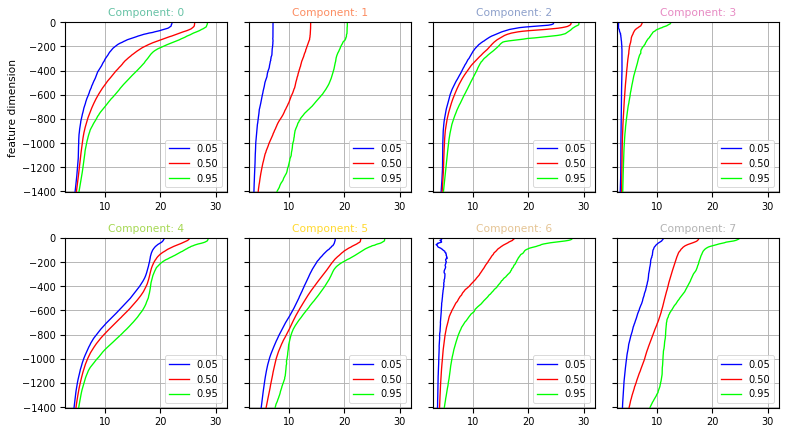

In [15]:
fig, ax = m.plot.quantile(ds['TEMP_Q'], maxcols=4, figsize=(10, 8), sharey=True)

## Geographic distribution of classes

A map of labels can now easily be plotted:

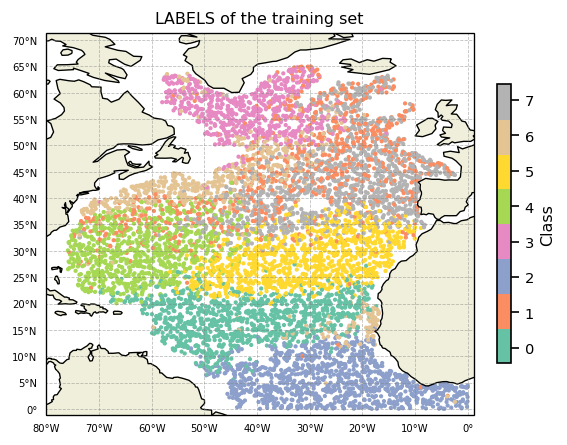

In [16]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set')
plt.show()

Since we predicted labels for 2 datasets, we can superimpose them

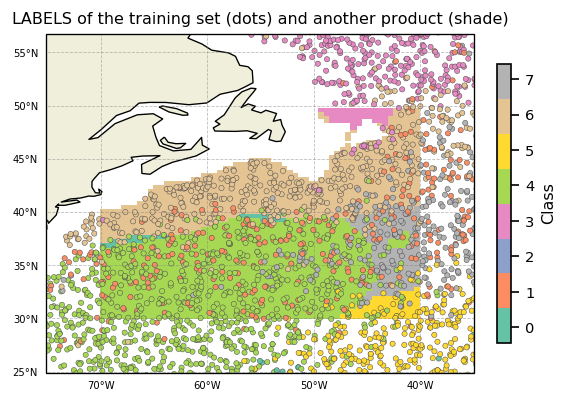

In [17]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-75,-35,25,55]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.pcolor(ds_gridded['longitude'], ds_gridded['latitude'], ds_gridded['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=10, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K, edgecolors=[0.3]*3, linewidths=0.3)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set (dots) and another product (shade)')
plt.show()

*Posteriors* are defined for each data point and give the probability of that point to belong to any of the classes. It can be plotted this way:

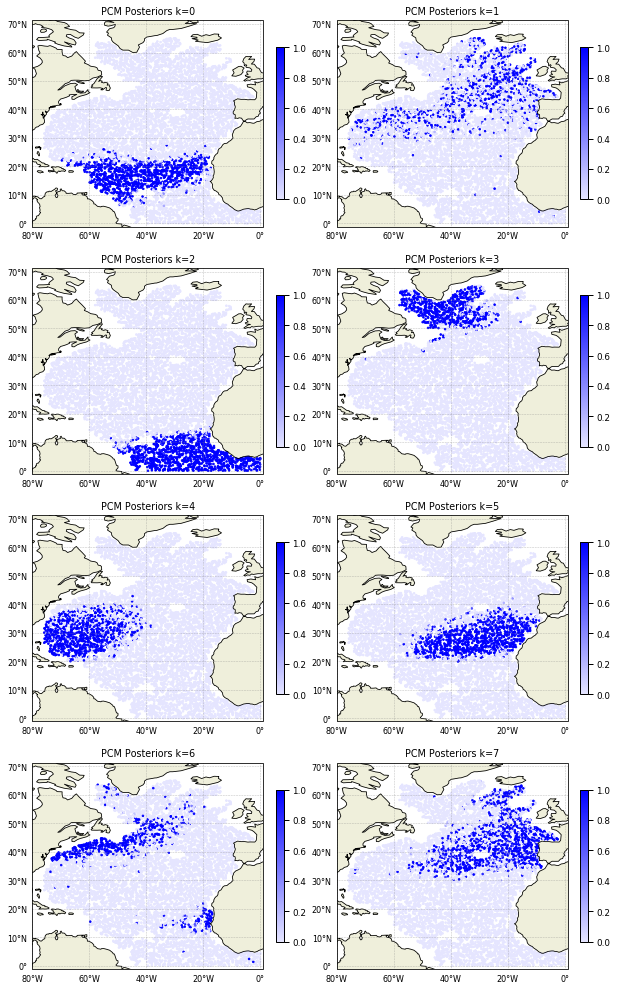

In [18]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([-80,1,-1,66]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_POST'].sel(pcm_class=k), 
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('PCM Posteriors k=%i' % k)